In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def straight_line_fit(x, y, x_err, y_err):
    # Weighted least squares fit
    weights = 1 / (y_err**2 + (x_err**2 * np.mean(np.diff(y)/np.diff(x)))**2)

    # Calculate weighted averages
    W = np.sum(weights)
    x_avg = np.sum(weights * x) / W
    y_avg = np.sum(weights * y) / W

    # Calculate slope and intercept using weighted least squares
    S_xx = np.sum(weights * (x - x_avg)**2)
    S_xy = np.sum(weights * (x - x_avg) * (y - y_avg))

    slope = S_xy / S_xx
    intercept = y_avg - slope * x_avg

    # Uncertainty in slope and intercept
    slope_err = np.sqrt(1 / S_xx)
    intercept_err = np.sqrt(np.sum(weights * (1 + (x - x_avg)**2 / S_xx)) / W)

    # Calculate x-intercept and its uncertainty
    x_intercept = -intercept / slope
    if intercept == 0:
        x_intercept_err = np.inf  # Infinite uncertainty if intercept is zero
    else:
        x_intercept_err = np.abs(x_intercept) * np.sqrt((slope_err / slope)**2 + (intercept_err / intercept)**2)

    return slope, intercept, slope_err, intercept_err, x_intercept, x_intercept_err


Left Slope: -0.002166666666666664 ± 0.0002812285657127301
Left Intercept: 0.44883333333333314 ± 1.0000014236100978
Left x-intercept: 207.15384615384633 ± 462.32167224827
Right Slope: 0.0073999999999999995 ± 0.0003993327768499183
Right Intercept: -0.476 ± 1.0000177168776156
Right x-intercept: 64.32432432432432 ± 135.18210307643477


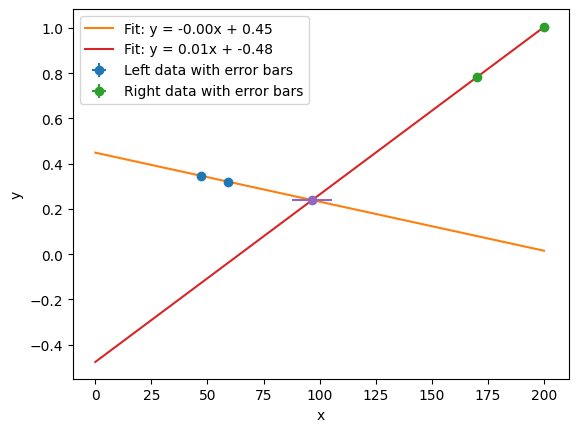

(96.67247386759583, 8.904746467727394, 0.23937630662020912)

In [ ]:
# Convex lens - Part C

x_left = np.array([47, 59])
y_left = np.array([0.347, 0.321])
x_left_err = np.array([1, 1])
y_left_err = np.array([0.001, 0.001])

x_right = np.array([170, 200])
y_right = np.array([0.782, 1.004])
x_right_err = np.array([1, 1])
y_right_err = np.array([0.003, 0.005])

slope_left, intercept_left, slope_err_left, intercept_err_left, x_intercept_left, x_intercept_err_left = straight_line_fit(x_left, y_left, x_left_err, y_left_err)
slope_right, intercept_right, slope_err_right, intercept_err_right, x_intercept_right, x_intercept_err_right = straight_line_fit(x_right, y_right, x_right_err, y_right_err)

print(f"Left Slope: {slope_left} ± {slope_err_left}")
print(f"Left Intercept: {intercept_left} ± {intercept_err_left}")
print(f"Left x-intercept: {x_intercept_left} ± {x_intercept_err_left}")

print(f"Right Slope: {slope_right} ± {slope_err_right}")
print(f"Right Intercept: {intercept_right} ± {intercept_err_right}")
print(f"Right x-intercept: {x_intercept_right} ± {x_intercept_err_right}")

x_extended = np.linspace(0, 200, 500)

# Plot the results
plt.errorbar(x_left, y_left, xerr=x_left_err, yerr=y_left_err, fmt='o', label='Left data with error bars')
plt.plot(x_extended, slope_left * x_extended + intercept_left, label=f'Fit: y = {slope_left:.2f}x + {intercept_left:.2f}')
#plt.axvline(x=x_intercept_left, color='r', linestyle='--', label=f'x-intercept = {x_intercept_left:.2f}')

plt.errorbar(x_right, y_right, xerr=x_right_err, yerr=y_right_err, fmt='o', label='Right data with error bars')
plt.plot(x_extended, slope_right * x_extended + intercept_right, label=f'Fit: y = {slope_right:.2f}x + {intercept_right:.2f}')
#plt.axvline(x=x_intercept_right, color='r', linestyle='--', label=f'x-intercept = {x_intercept_right:.2f}')

plt.errorbar(96.67247386759583, 0.23937630662020912, xerr=8.904746467727394, fmt='o')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Let's calculate the intersection of the two lines along with uncertainty propagation

import numpy as np

def line_intersection(slope1, intercept1, slope_err1, intercept_err1, slope2, intercept2, slope_err2, intercept_err2):
    # The intersection occurs when y1 = y2 -> slope1 * x + intercept1 = slope2 * x + intercept2
    # Rearranging: x_intersect = (intercept2 - intercept1) / (slope1 - slope2)
    if slope1 == slope2:
        return None, None  # Parallel lines, no intersection

    x_intersect = (intercept2 - intercept1) / (slope1 - slope2)

    # Uncertainty in x_intersect
    intercept_diff_err = np.sqrt(intercept_err1**2 + intercept_err2**2)  # Error in (intercept2 - intercept1)
    slope_diff_err = np.sqrt(slope_err1**2 + slope_err2**2)  # Error in (slope1 - slope2)

    x_intersect_err = np.abs(x_intersect) * np.sqrt((intercept_diff_err / (intercept2 - intercept1))**2 + (slope_diff_err / (slope1 - slope2))**2)

    return x_intersect, x_intersect_err

# Example values from the user's provided data for left and right lines

# Left line fit results
slope_left = -0.002166666666666664
intercept_left = 0.44883333333333314
slope_err_left = 0.0002812285657127301
intercept_err_left = 0.03236427544140567

# Right line fit results
slope_right = 0.0073999999999999995
intercept_right = -0.476
slope_err_right = 0.0003993327768499183
intercept_err_right = 0.06308908430639304

# Calculate intersection
x_intersect, x_intersect_err = line_intersection(slope_left, intercept_left, slope_err_left, intercept_err_left,
                                                 slope_right, intercept_right, slope_err_right, intercept_err_right)
y_intersect = slope_left * x_intersect + intercept_left

x_intersect, x_intersect_err, y_intersect

Slope: 0.005339958382232303 ± 0.0038272466854733455
Intercept: 0.7665010404441924 ± 1.0020579067457973
x-intercept: -143.54063937924667 ± 214.0034715387297


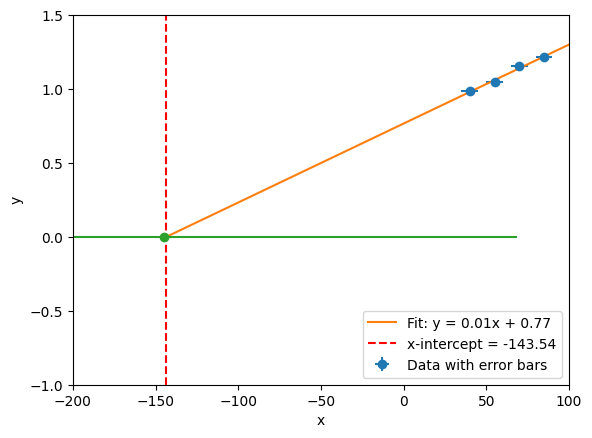

In [ ]:
# Concave lens - Part E

x = np.array([40, 55, 70, 85])
y = np.array([0.984, 1.047, 1.155, 1.215])
x_err = np.array([5, 5, 5, 5])
y_err = np.array([0.003, 0.003, 0.004, 0.003])

slope, intercept, slope_err, intercept_err, x_intercept, x_intercept_err = straight_line_fit(x, y, x_err, y_err)

print(f"Slope: {slope} ± {slope_err}")
print(f"Intercept: {intercept} ± {intercept_err}")
print(f"x-intercept: {x_intercept} ± {x_intercept_err}")

x_extended = np.linspace(-145.11148514190472, 100, 500)

# Plot the results
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', label='Data with error bars')
plt.plot(x_extended, slope * x_extended + intercept, label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.axvline(x=x_intercept, color='r', linestyle='--', label=f'x-intercept = {x_intercept:.2f}')

plt.errorbar(-145.11148514190472, 0, xerr= 214.0034715387297, fmt='o')

plt.xlim(-200, 100)
plt.ylim(-1, 1.5)
#plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
